#  <span style="color:#3366ff"> Moteur de Recommandations de films (Arnaud ROUSSEAU)

# <span style="color:#3366ff"> 29 Mai 2018 (Part 3 Cleanée - Variables Alphanumériques)

<span style="color:#3366ff"> Ce notebook est dédié à l'analyse des variables Alpha-numériques de la base de films "imdb-5000-movie-dataset".
    
<span style="color:#3366ff"> Les variables alphanumériques conservées sont:   
<span style="color:#3366ff">- movie_title,    
<span style="color:#3366ff">- movie_imdb_link (pour l'ID),    
<span style="color:#3366ff">- genres,    
<span style="color:#3366ff">- director_names,    
<span style="color:#3366ff">- plot_keywords,    
<span style="color:#3366ff">- content_rating.    

### Chargement des librairies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

from collections import Counter

from sklearn import preprocessing, decomposition, cluster, metrics

### Ouverture de la base cleanée

In [2]:
data_films_clean_alph = pd.read_csv(
    'DATA/data_films_clean_alph.csv',    
    encoding='latin_1', 
    index_col=0,
    low_memory = False)

In [3]:
# Cette base num mesure
shape = data_films_clean_alph.shape

print("Cette base de données numériques contient",shape[0], 
      "Films décrits avec", shape[1], "paramètres.")

Cette base de données numériques contient 4585 Films décrits avec 5 paramètres.


In [4]:
data_films_clean_alph.head(8)

,movie_imdb_link,genres,director_name,plot_keywords,content_rating
movie_title,,,,,
Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Action|Adventure|Fantasy|Sci-Fi,James Cameron,avatar|future|marine|native|paraplegic,PG-13
Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Action|Adventure|Fantasy,Gore Verbinski,goddess|marriage ceremony|marriage proposal|pi...,PG-13
Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Action|Adventure|Thriller,Sam Mendes,bomb|espionage|sequel|spy|terrorist,PG-13
The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,Action|Thriller,Christopher Nolan,deception|imprisonment|lawlessness|police offi...,PG-13
John Carter,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,Action|Adventure|Sci-Fi,Andrew Stanton,alien|american civil war|male nipple|mars|prin...,PG-13
Spider-Man 3,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,Action|Adventure|Romance,Sam Raimi,sandman|spider man|symbiote|venom|villain,PG-13
Tangled,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,17th century|based on fairy tale|disney|flower...,PG
Avengers: Age of Ultron,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,Action|Adventure|Sci-Fi,Joss Whedon,artificial intelligence|based on comic book|ca...,PG-13


<span style="color:#3366ff"> On peut voir que les variables dans "genres" et "plot_keywords" sont contaténées.

# Comptage des Strings : conversion en booléens

### Déconcaténation de la variable 'genres'

In [5]:
genre_dumm = data_films_clean_alph['genres'].str.get_dummies(sep='|')
genre_dumm.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
John Carter,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
shape = genre_dumm.shape

print("Ce tableau contient",shape[0], 
      "Films décrits avec", shape[1], "genres.")

Ce tableau contient 4585 Films décrits avec 23 genres.


### Comptage des occurences (issus de "genres")

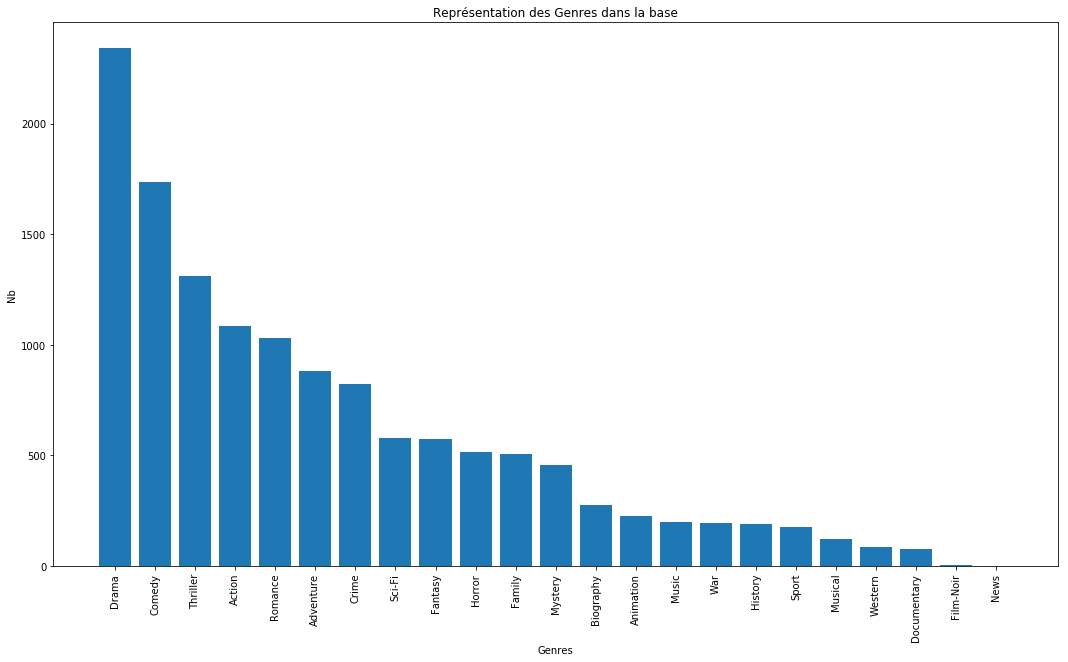

In [7]:
plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.set_title("Représentation des Genres dans la base")
plt.xlabel('Genres') 
plt.ylabel("Nb") 
plt.xticks(rotation='vertical')   

sum_genre = genre_dumm.sum().sort_values(ascending=False)
sum_genre_ = pd.DataFrame(sum_genre)
plt.bar(sum_genre_.index,sum_genre_[0])
plt.show()

In [8]:
sum_genre.head(6)

Drama        2340
Comedy       1737
Thriller     1312
Action       1086
Romance      1031
Adventure     881
dtype: int64

<span style="color:#3366ff"> Les 5 Genres (sur 23) les mieux représentés dans la base sont:   
<span style="color:#3366ff"> - Drama         
<span style="color:#3366ff"> - Comedy          
<span style="color:#3366ff"> - Thriller        
<span style="color:#3366ff"> - Action           
<span style="color:#3366ff"> - Romance    
    
<span style="color:#3366ff"> <strong>Conclusion:</strong> variable conservée car bien répartie sur la base. 

### Déconcaténation de 'plot_keywords'

In [9]:
plot_keywords_dumm = data_films_clean_alph['plot_keywords'].str.get_dummies(sep='|')
plot_keywords_dumm.head()

,10 year old,1000000 b.c.,1190s,12 step program,12 year old,12 year time span,12th century,13 year old,13 year olds,13th birthday,...,zodiac,zodiac killer,zoloft,zombie,zombie apocalypse,zombie spoof,zoo,zookeeper,zoologist,zorro
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pirates of the Caribbean: At World's End,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spectre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dark Knight Rises,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
John Carter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Comptage des occurences (issus de "plot_keywords")

In [10]:
shape = plot_keywords_dumm.shape

print("Ce tableau contient",shape[0], 
      "Films décrits avec", shape[1], "mots-clefs.")

Ce tableau contient 4585 Films décrits avec 7748 mots-clefs.


In [11]:
sum_keywords = plot_keywords_dumm.sum().sort_values(ascending=False)
sum_keywords.head(5)

love      188
friend    157
murder    152
death     122
police    115
dtype: int64

<span style="color:#3366ff"> Les occurences les plus fréquentes dans les 7748 "plot_keywords" sont:   
<span style="color:#3366ff"> - love (188 fois)   
<span style="color:#3366ff"> - friend (157 fois);   
<span style="color:#3366ff"> - murder (152 fois).      
    
<span style="color:#3366ff"> <strong>Conclusion:</strong> Les "plot_keywords" ont de trop faibles occurences pour être exploités.

### Comptage des occurences des	'director_name'

In [12]:
directors_dumm = data_films_clean_alph['director_name'].str.get_dummies(sep='|')
directors_dumm.head()

,A. Raven Cruz,Aaron Hann,Aaron Schneider,Aaron Seltzer,Abel Ferrara,Adam Brooks,Adam Goldberg,Adam Green,Adam Jay Epstein,Adam Marcus,...,Yimou Zhang,Yorgos Lanthimos,Zach Braff,Zach Cregger,Zack Snyder,Zak Penn,Zal Batmanglij,Álex de la Iglesia,Émile Gaudreault,Étienne Faure
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pirates of the Caribbean: At World's End,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spectre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dark Knight Rises,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
John Carter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
shape = directors_dumm.shape

print("Ce tableau contient",shape[0], 
      "Films décrits avec", shape[1], "noms de réalisateurs.")

Ce tableau contient 4585 Films décrits avec 2109 noms de réalisateurs.


In [14]:
sum_directors = directors_dumm.sum().sort_values(ascending=False)
sum_directors.head(8)

Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         17
Steven Soderbergh    16
Tim Burton           16
Renny Harlin         15
dtype: int64

<span style="color:#3366ff"> Les réalisateurs les plus représentés dans la base sont:   
<span style="color:#3366ff"> - Steven Spielberg (26 fois);   
<span style="color:#3366ff"> - Woody Allen (22 fois);   
<span style="color:#3366ff"> - Martin Scorsese (20 fois);   
<span style="color:#3366ff"> - Clint Eastwood (20 fois);   
<span style="color:#3366ff"> - Ridley Scott (17 fois).        
    
<span style="color:#3366ff"> <strong>Conclusion:</strong> Les "director_name" ont de trop faibles occurences pour être exploités.

### Comptage des occurences des 'content_rating'

In [15]:
rating_dumm = data_films_clean_alph['content_rating'].str.get_dummies(sep='|')
rating_dumm.head()

,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,TV-14,TV-G,TV-PG,Unrated,X
movie_title,,,,,,,,,,,,,,,
Avatar,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Pirates of the Caribbean: At World's End,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Spectre,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
The Dark Knight Rises,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
John Carter,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
shape = rating_dumm.shape

print("Ce tableau contient",shape[0], 
      "Films décrits avec", shape[1], "niveaux de visionnage.")

Ce tableau contient 4585 Films décrits avec 15 niveaux de visionnage.


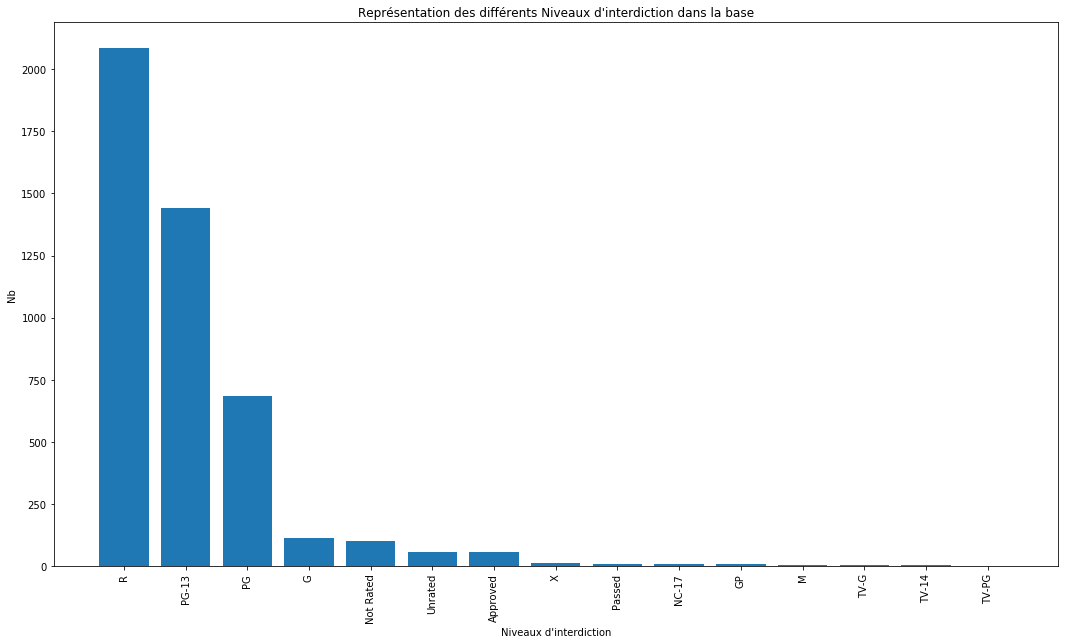

In [17]:
plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.set_title("Représentation des différents Niveaux d'interdiction dans la base")
plt.xlabel("Niveaux d'interdiction") 
plt.ylabel("Nb") 
plt.xticks(rotation='vertical')   

sum_rating = rating_dumm.sum().sort_values(ascending=False)
sum_rating_ = pd.DataFrame(sum_rating)
plt.bar(sum_rating_.index,sum_rating_[0])
plt.show()

<span style="color:#3366ff"> <strong>Conclusion:</strong> Variable conservée car relativement bien répartie sur la base par rapport aux précédantes.

<span style="color:#3366ff"> 

## Fusion des tableaux Genres + Rating

In [18]:
data_films_alpha_final = pd.concat([genre_dumm, rating_dumm])

In [19]:
data_films_alpha_final = data_films_alpha_final.fillna(0)

In [20]:
data_films_alpha_final.describe()

,Action,Adventure,Animation,Approved,Biography,Comedy,Crime,Documentary,Drama,Family,...,Sci-Fi,Sport,TV-14,TV-G,TV-PG,Thriller,Unrated,War,Western,X
count,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,...,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000,9170.000000
mean,0.118430,0.096074,0.024755,0.005998,0.030207,0.189422,0.089749,0.008397,0.255180,0.055398,...,0.063032,0.019411,0.000327,0.000327,0.000109,0.143075,0.006325,0.021047,0.009378,0.001418
std,0.323134,0.294709,0.155385,0.077217,0.171166,0.391865,0.285838,0.091254,0.435986,0.228768,...,0.243033,0.137972,0.018085,0.018085,0.010443,0.350169,0.079282,0.143548,0.096392,0.037627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Reduction du nombre de dimensions avec la PCA

In [21]:
# preprocessing
data_films_prepro = preprocessing.scale(data_films_alpha_final)

### Test de mesure de la variance uniquement avec Genres = "genre_dumm" 

In [22]:
# preprocessing
data_films_prepro_test = preprocessing.scale(genre_dumm)
pca_test = decomposition.PCA(n_components=2)
pca_test.fit(data_films_prepro_test)
print("Variance des 2 premieres composantes principales", 
      pca_test.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.11111818 0.21279099]


<span style="color:#3366ff"> Les deux 1eres Composantes Principales des 23 variables issues de la déconcaténation de "Genre" représentent 21.2% de la variance. 

In [23]:
# preprocessing
data_films_prepro_test = preprocessing.scale(genre_dumm)
pca_test = decomposition.PCA(n_components=3)
pca_test.fit(data_films_prepro_test)
print("Variance des 2 premieres composantes principales", 
      pca_test.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.11111676 0.21277302 0.28437726]


<span style="color:#3366ff"> Les trois 1eres Composantes Principales des 23 variables issues de la déconcaténation de "genres" représentent 28.4% de la variance. 

### PCA avec 2 dimensions de Genres + Rating

In [24]:
pca = decomposition.PCA(n_components=2)
pca.fit(data_films_prepro)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
print("Variance des 2 premieres composantes principales", 
      pca.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.07408149 0.13261641]


<span style="color:#3366ff"> Les deux 1eres PC représentent 13.2% de la variance.

In [26]:
data_films_prepro_trans= pca.transform(data_films_prepro)

# Cette base mesure
shape = data_films_prepro_trans.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "Films décrits avec", shape[1], "CP.")

Le tableau des Composantes Principales contient 9170 Films décrits avec 2 CP.


In [27]:
data_films_prepro_trans

array([[ 3.53608911,  1.25897446],
       [ 2.55868922,  1.31831857],
       [ 2.08544988, -0.82469116],
       ...,
       [-1.46678323,  0.46065424],
       [-1.23685451,  0.34966293],
       [-1.28582468,  0.37377349]])

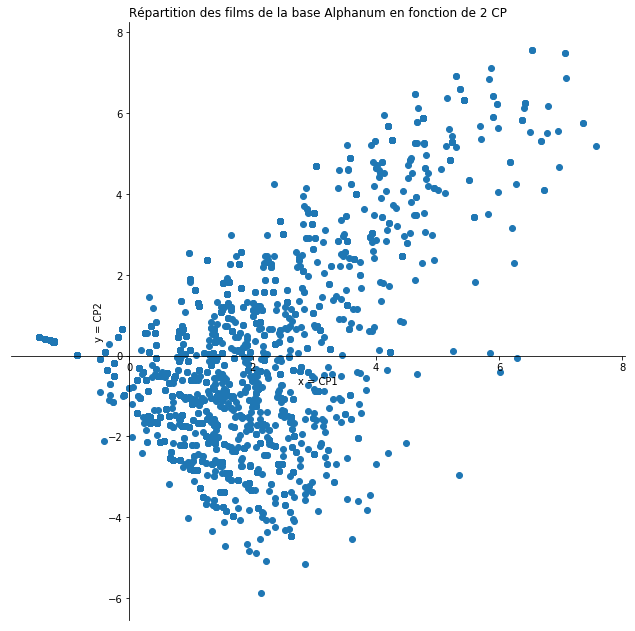

In [28]:
fig = plt.figure(figsize=(11,11))

ax = plt.subplot()
ax.set_title('Répartition des films de la base Alphanum en fonction de 2 CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(data_films_prepro_trans[:,0], data_films_prepro_trans[:,1])

<span style="color:#3366ff"> L'ensemble des fims est compacté, cette data ne sera pas facile à séparer en plusieurs groupes.    

### Essais avec 3 dimensions

In [29]:
pca3 = decomposition.PCA(n_components=3)
pca3.fit(data_films_prepro)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
print("Variance des 3 premieres composantes principales", 
      pca3.explained_variance_ratio_.cumsum())

Variance des 3 premieres composantes principales [0.07408148 0.13261551 0.18604064]


<span style="color:#3366ff"> Les deux 1eres PC représentent 18.6% de la variance.

In [31]:
data_films_prepro_trans_3= pca3.transform(data_films_prepro)

# Cette base mesure
shape = data_films_prepro_trans_3.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "Films décrits avec", shape[1], "CP.")

Le tableau des Composantes Principales contient 9170 Films décrits avec 3 CP.


In [32]:
data_films_prepro_trans_3

array([[ 3.53537475,  1.25807927, -2.81125602],
       [ 2.55828821,  1.31718733, -1.7044478 ],
       [ 2.08510738, -0.82741899, -2.11080683],
       ...,
       [-1.46655682,  0.46057049, -0.29400447],
       [-1.23777853,  0.35101116, -0.21101973],
       [-1.28611718,  0.36667859, -0.22601772]])

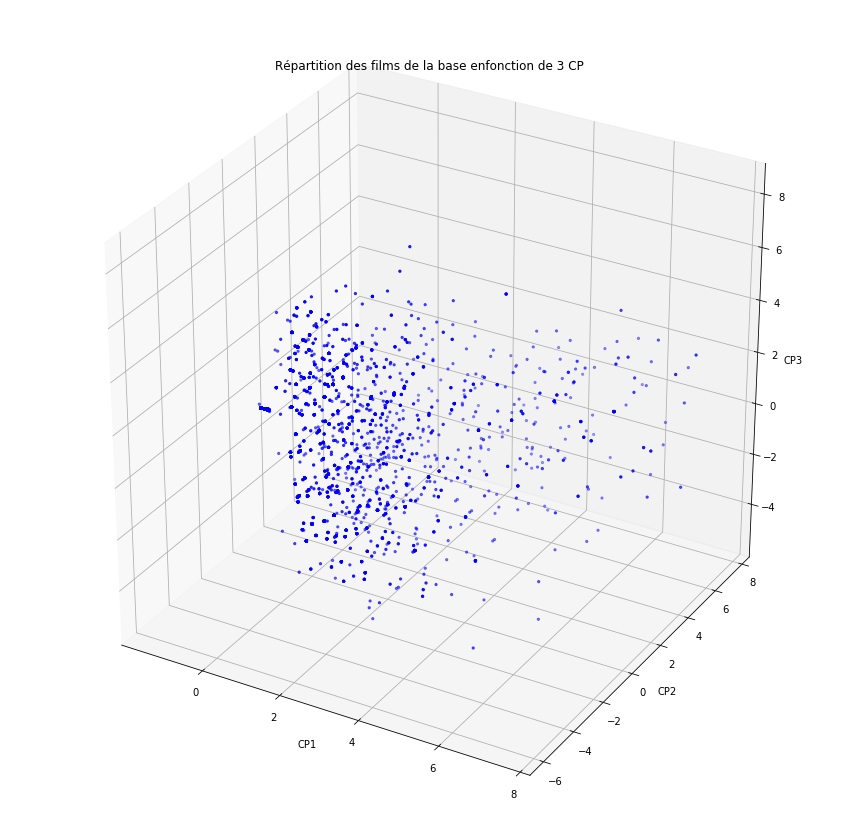

In [33]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c='b', marker='.')

ax.set_title('Répartition des films de la base enfonction de 3 CP') 
    
ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
ax.set_zlabel('CP3')
 
plt.show()

<span style="color:#3366ff"> <strong> L'ensemble des films est répartie dans un nuage épart; cette data ne sera pas facile à séparer en plusieurs groupes.    

# Recherche des variables latentes

## Affichage des contribution de chaque variable aux 2 premières Composantes Principales

(-0.45, 0.45)

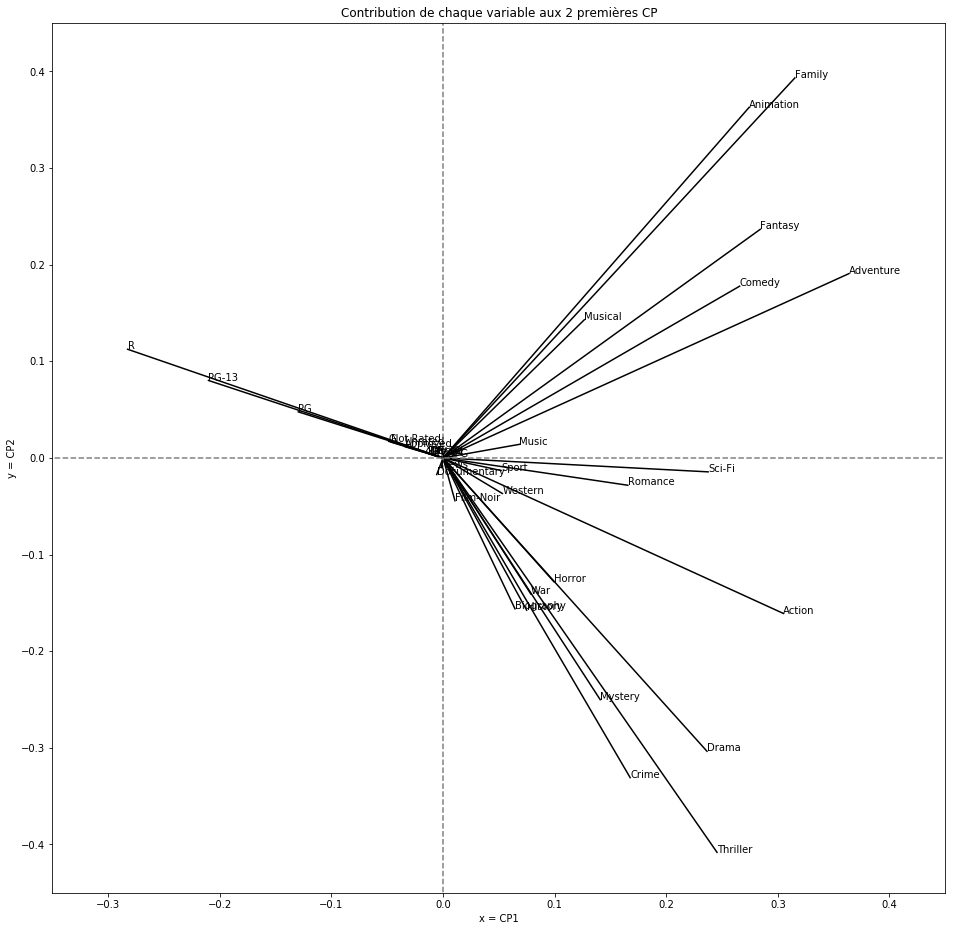

In [34]:
pcs = pca.components_

fig = plt.figure(figsize=(16,16))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data_films_alpha_final.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.35, 0.45])
plt.ylim([-0.45, 0.45])

<span style="color:#3366ff"> <strong>Remarque:</strong> On peut discerner des groupes :    
<span style="color:#3366ff"> - En haut à droite: les films grands publiques,    
<span style="color:#3366ff"> - En bas à droite: les films violents,    
<span style="color:#3366ff"> - En haut à gauche: les Rated R.    

## Affichage des contribution de chaque variable aux 3 premières Composantes Principales

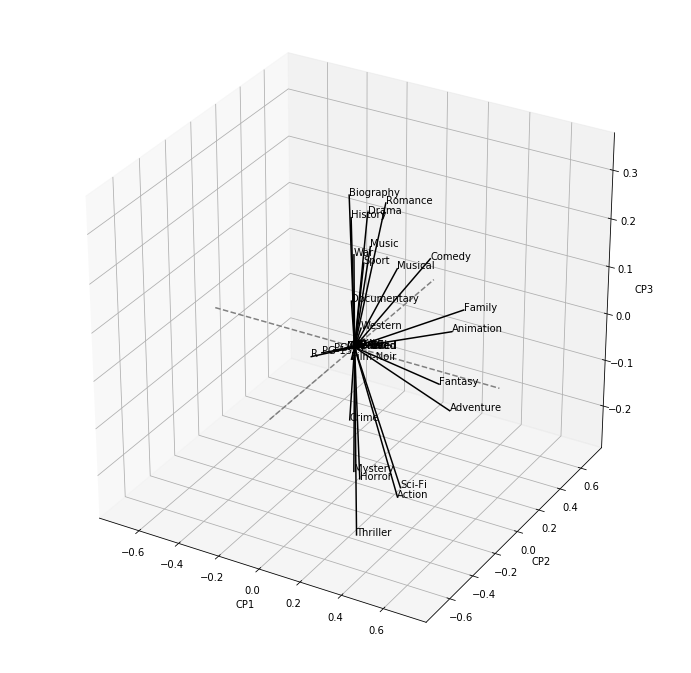

In [35]:
pcs3 = pca3.components_

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111,projection='3d')

#ax.scatter(pcs3[:,0], 
 #          pcs3[:,1], 
 #          pcs3[:,2], 
   #        c='b', marker='.')

for i , (x, y, z) in enumerate(zip(pcs3[0, :], pcs3[1, :], pcs3[2, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], [0, z], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    ax.text(x, y, z, data_films_alpha_final.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

 
ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
ax.set_zlabel('CP3')
 
plt.show()

<span style="color:#3366ff"> <strong>Remarque:</strong> On peut discerner des groupes :    
<span style="color:#3366ff"> - En haut à droite: les films grands publiques (comedy, famille , animation, musique) + guerre !!   
<span style="color:#3366ff"> - En bas : les films violents (horror, crime, action);
<span style="color:#3366ff"> - Au milieu à gauche: les "Content-rating"

# Identification de groupes de films par Clustering avec K MEANS

### Recherche du Nb de Clusters: silhouette

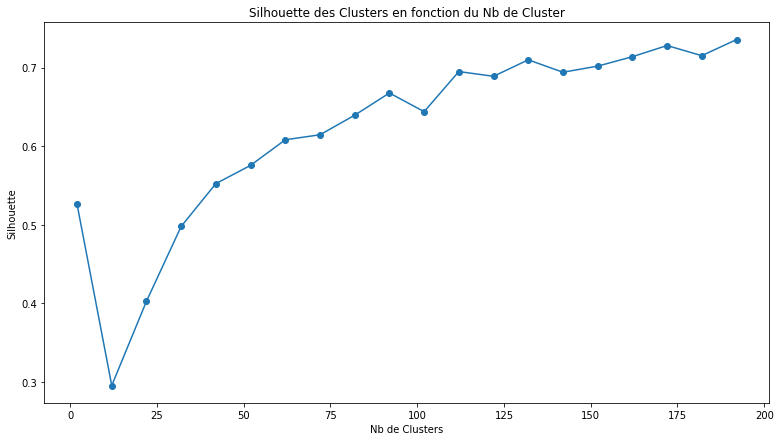

In [36]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")


silhouettes = []
for num_cluster in range(2,200, 10):
    cls_kmean = cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_kmean.labels_)
    silhouettes.append(silh)

plt.plot(range(2,200, 10), silhouettes, marker='o')

<span style="color:#3366ff"> Plus le nombre de Cluster est élevé, plus la silouhette est élevée.

### Recherche du Nb de Clusters: calinski

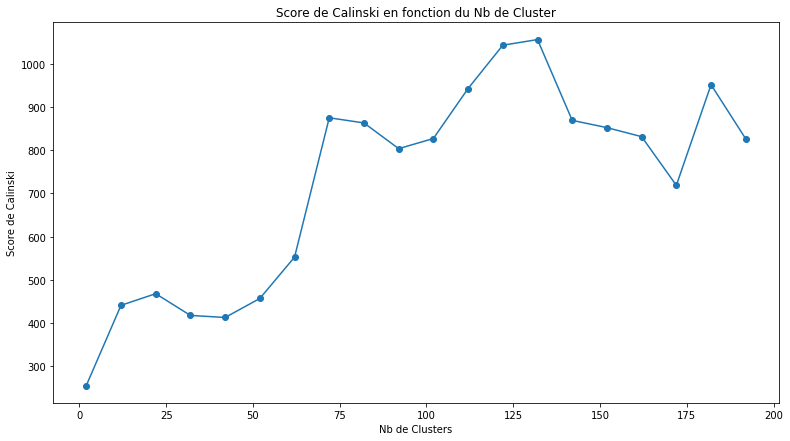

In [37]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

calinski = []
for num_cluster in range(2,200, 10):
    cls_kmean= cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_kmean.labels_)
    calinski.append(cali)

plt.plot(range(2,200, 10), calinski, marker='o')

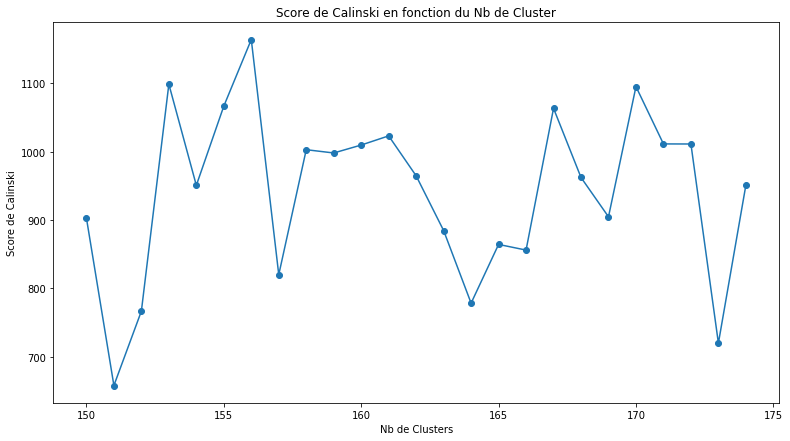

In [38]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

calinski = []
for num_cluster in range(150,175):
    cls_kmean= cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_kmean.labels_)
    calinski.append(cali)

plt.plot(range(150,175), calinski, marker='o')

<span style="color:#3366ff"> Cal = 1075 pour N=170.

<span style="color:#3366ff"> <strong>Conclusion:</strong>  Plus le nombre de Cluster est élevé, plus la silouhette est élevée.

### Affichage des Clusters du K-MEANS en 2 dimensions

Text(0.5,1,'Affichage des 170 clusters K-MEANS en 2D')

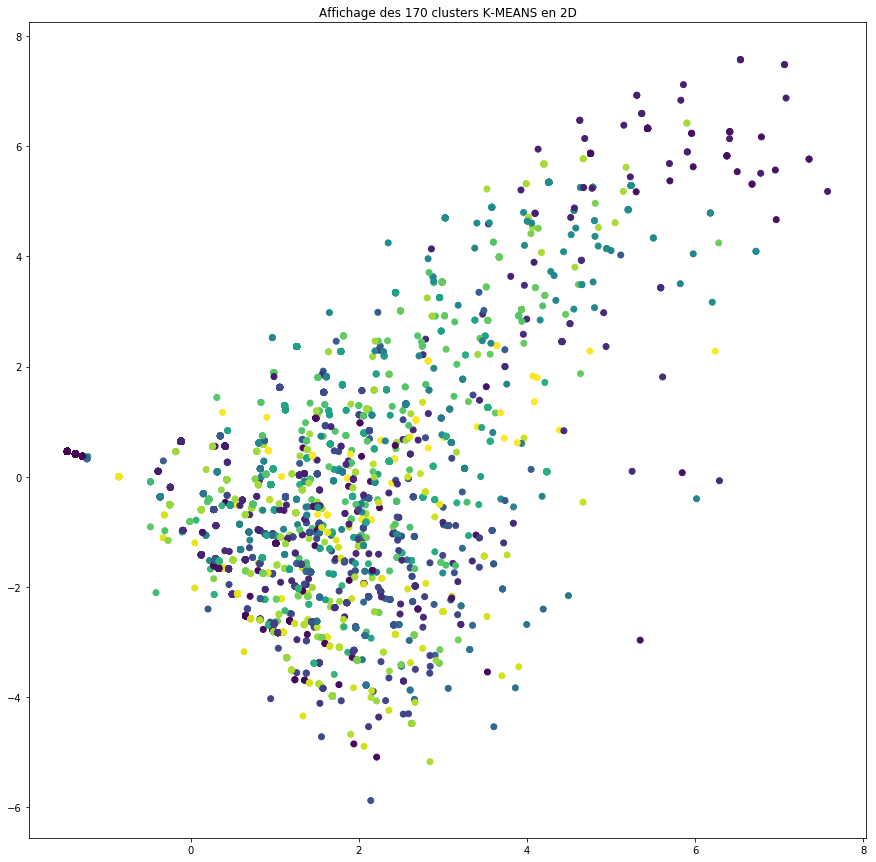

In [39]:
fig = plt.figure(figsize=(15,15))

cls_kmean_170= cluster.KMeans(170, n_init=1, init='random')
cls_kmean_170.fit(data_films_prepro)
ax = fig.add_subplot(111)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_kmean_170.labels_)
ax.set_title("Affichage des 170 clusters K-MEANS en 2D")

### Affichage des Clusters du K-MEANS en 3 dimensions

Text(0.5,0.92,'Affichage des 170 clusters K-MEANS en 3D')

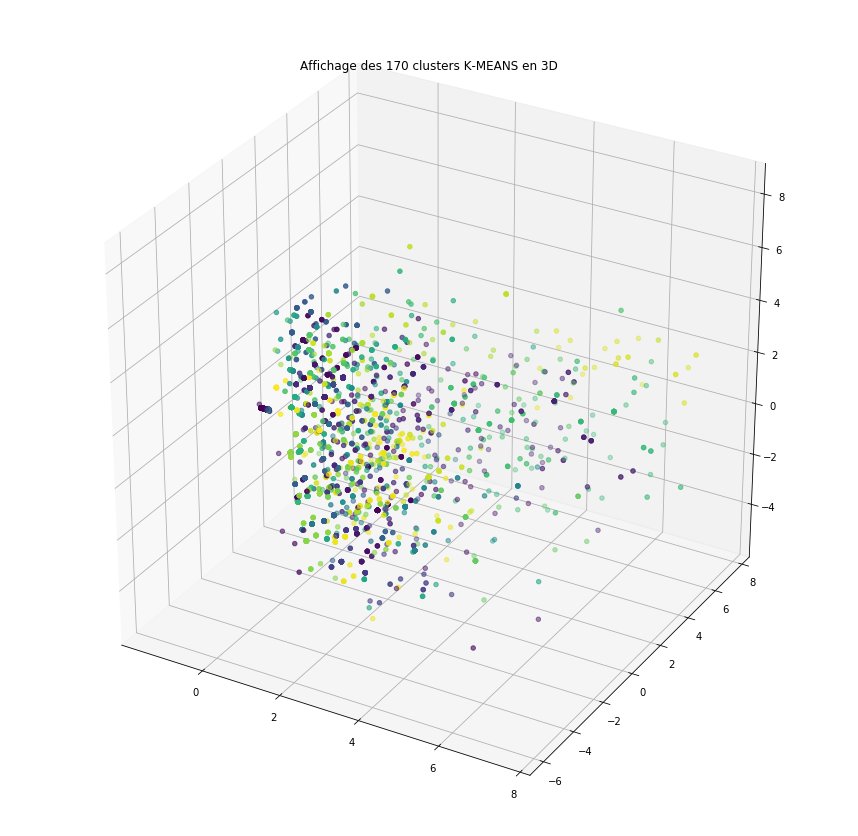

In [53]:
fig = plt.figure(figsize=(15,15))

#ax = fig.add_subplot(121,projection='3d')

cls_kmean_170 = cluster.KMeans(170, n_init=1, init='random')
cls_kmean_170.fit(data_films_prepro)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_kmean_170.labels_)
ax.set_title("Affichage des 170 clusters K-MEANS en 3D")

# Conclusion Clustering par K-MEANS

<span style="color:#3366ff"> Le clustering K-MEANS a un score Calinski de 1075 avec une Silhouette de 0.7 pour un clustering de 170 groupes.

# Identification de groupes de films par Clustering avec DBSCAN

<span style="color:#3366ff"> <strong> --> DBSCAN a 2 hyperparamètres à déterminer: "epsilon" & le "Nb mini de point par Clusters"

### Recherche de la variable Epsilon de DBSCAN: silhouette

<strong> eps de 0.6 a 6 / Min_sample à 6

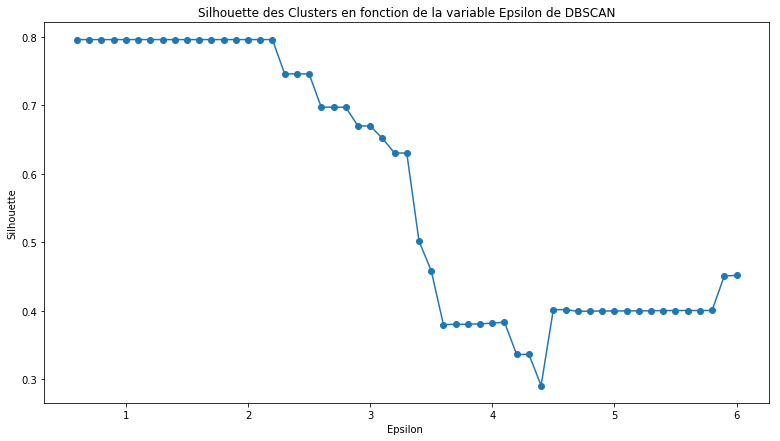

In [41]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction de la variable Epsilon de DBSCAN')
plt.ylabel("Silhouette")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
                2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,
                3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
                4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 
                5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]

silhouettes = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=6, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)
 
plt.plot(range_epsilon, silhouettes, marker='o')

In [42]:
test  =max(silhouettes)
test

0.7957698860032729

<span style="color:#3366ff"> Entre 0.6 < Epsilon < 2.2, la silhouette vaut 0.79.

### Recherche de la variable Epsilon de DBSCAN: Calinski

<strong> eps de 0.6 a 6 / Min_sample à 6

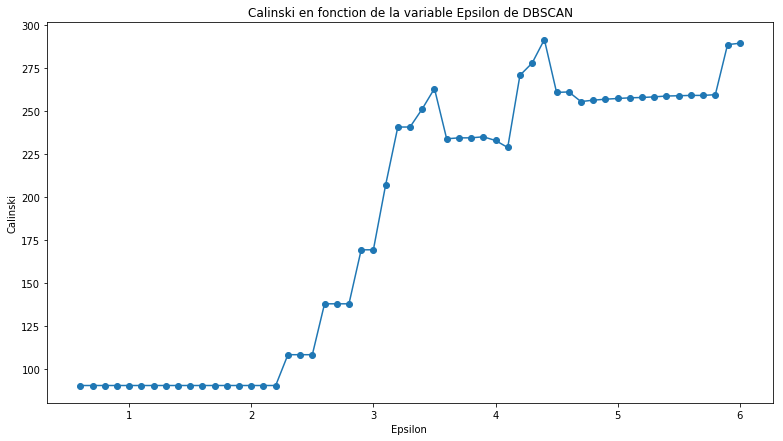

In [43]:
plt.figure(figsize=(13,7))

plt.title('Calinski en fonction de la variable Epsilon de DBSCAN')
plt.ylabel("Calinski")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
                2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,
                3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
                4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 
                5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]

calinski = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=6, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)

    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range_epsilon, calinski, marker='o')

In [44]:
test  =max(calinski)
test

291.5265084173618

<span style="color:#3366ff"> Cal = 291 pour Eps = 4.3  avec N=6.

<strong> eps de 0.6 a 6 / Min_sample à 15

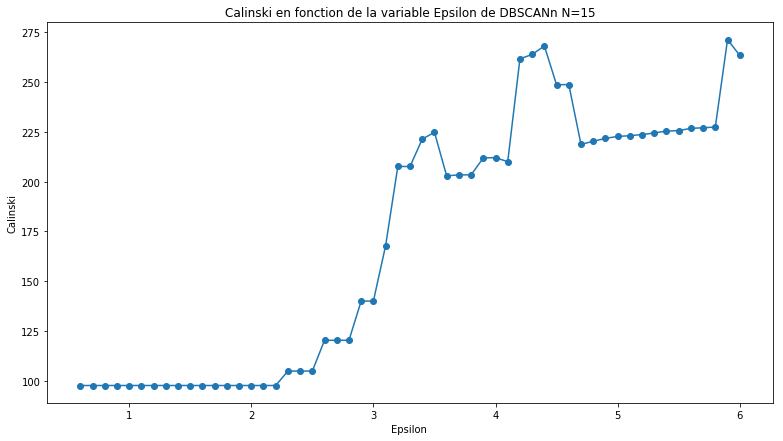

In [46]:
plt.figure(figsize=(13,7))

plt.title('Calinski en fonction de la variable Epsilon de DBSCANn N=15')
plt.ylabel("Calinski")
plt.xlabel("Epsilon ")

#cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’,metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

range_epsilon =[0.6, 0.7, 0.8, 0.9, 1.0, 
                1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
                2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,
                3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
                4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 
                5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]

calinski = []
for epsilon_val in range_epsilon:
    #epsilon_val = epsilon_val/10
    cls_dbscan= cluster.DBSCAN(eps=epsilon_val, 
                        min_samples=15, # le film d'entré + les 5 autres 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)

    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range_epsilon, calinski, marker='o')

In [47]:
test  =max(calinski)
test

271.2271420339365

<span style="color:#3366ff">  Cal = 271 pour E=5.8 avec N=15

### Recherche du Nb de points par Cluster de DBSCAN: silhouette

<strong> eps = 0.7 / Nb point range = 6 -> 100

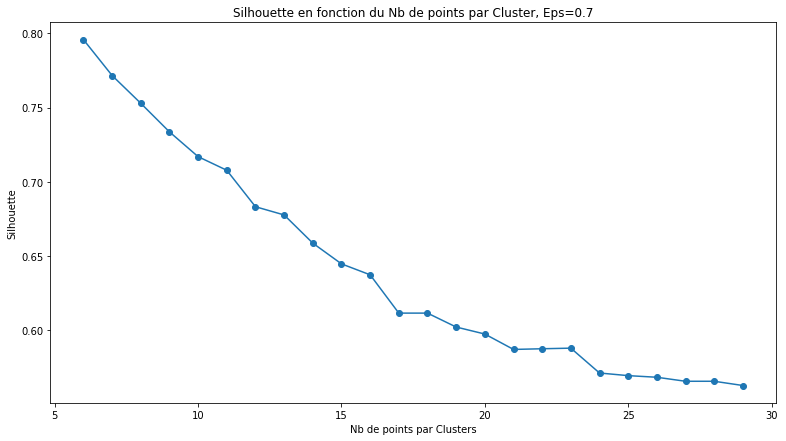

In [48]:
plt.figure(figsize=(13,7))

plt.title('Silhouette en fonction du Nb de points par Cluster, Eps=0.7')
plt.ylabel("Silhouette")
plt.xlabel("Nb de points par Clusters")

silhouettes = []
for min_samples_val in range(6,30):
    cls_dbscan= cluster.DBSCAN(eps=0.7, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_dbscan.labels_)
    silhouettes.append(silh)

plt.plot(range(6,30), silhouettes, marker='o')

In [49]:
test  =max(silhouettes)
test

0.7957698860032729

<span style="color:#3366ff"> S= .79 pour N=6.

### Recherche du Nb sample par Cluster de DBSCAN: Calinski

N de 6 a 200 avec Eps =0.7

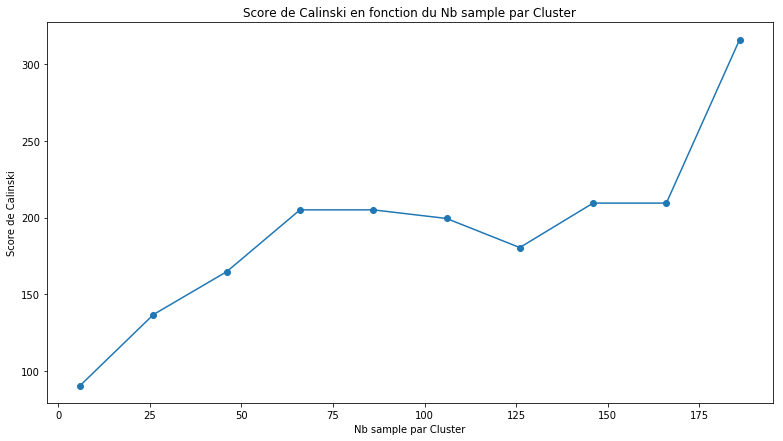

In [50]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(6,200, 20):
    cls_dbscan= cluster.DBSCAN(eps=0.7, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(6,200, 20), calinski, marker='o')

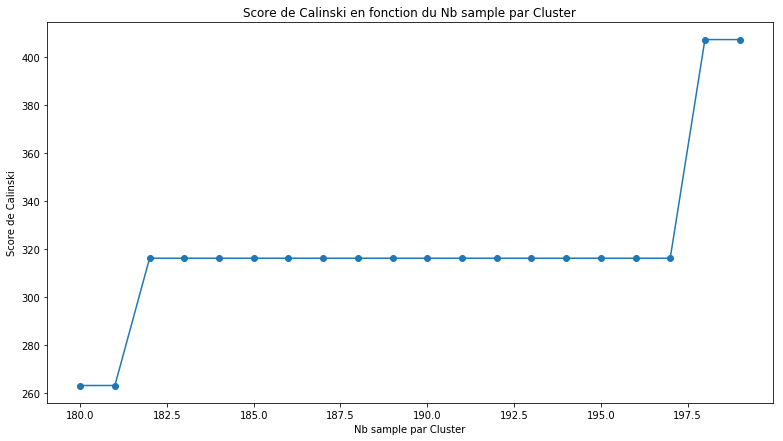

In [51]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(180,200):
    cls_dbscan= cluster.DBSCAN(eps=0.7, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(180,200), calinski, marker='o')

In [52]:
test  =max(calinski)
test

407.1061511653409

<span style="color:#3366ff"> Calinski = 407 pour N=198

N de 6 à 200 avec Eps=4.3

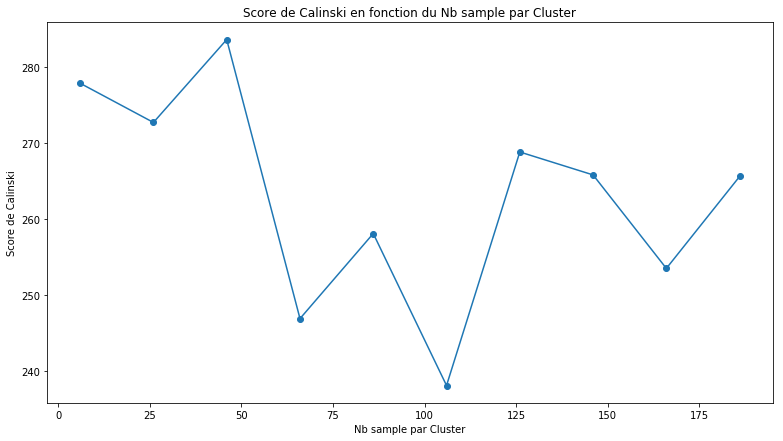

In [56]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb sample par Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(6,200, 20):
    cls_dbscan= cluster.DBSCAN(eps=4.3, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(6,200, 20), calinski, marker='o')

In [57]:
test  =max(calinski)
test

283.6227252096807

<span style="color:#3366ff"> Calinski = 283 

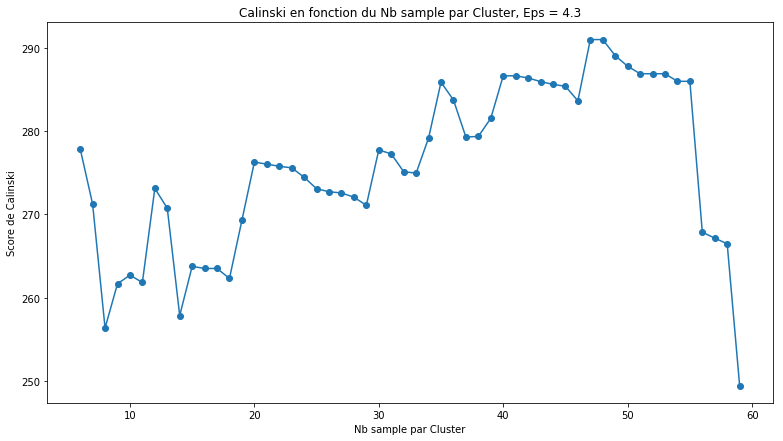

In [59]:
plt.figure(figsize=(13,7))

plt.title('Calinski en fonction du Nb sample par Cluster, Eps = 4.3')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb sample par Cluster")

calinski = []
for min_samples_val in range(6,60):
    cls_dbscan= cluster.DBSCAN(eps=4.3, 
                        min_samples=min_samples_val, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
    cls_dbscan.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_dbscan.labels_)
    calinski.append(cali)

plt.plot(range(6,60), calinski, marker='o')

In [60]:
test  =max(calinski)
test

290.96372987776783

<span style="color:#3366ff"> Calinski = 290 pour N=47

<span style="color:#3366ff"> <Strong> Conclusion:</Strong> Le meilleur Calinski est de 407 pour Eps=0.7 et N=198

### Affichage des Clusters de DBSCAN en 2 dimensions

Text(0.5,1,'DBSCAN en 2D avec eps = 0.7 & MiniP = 198')

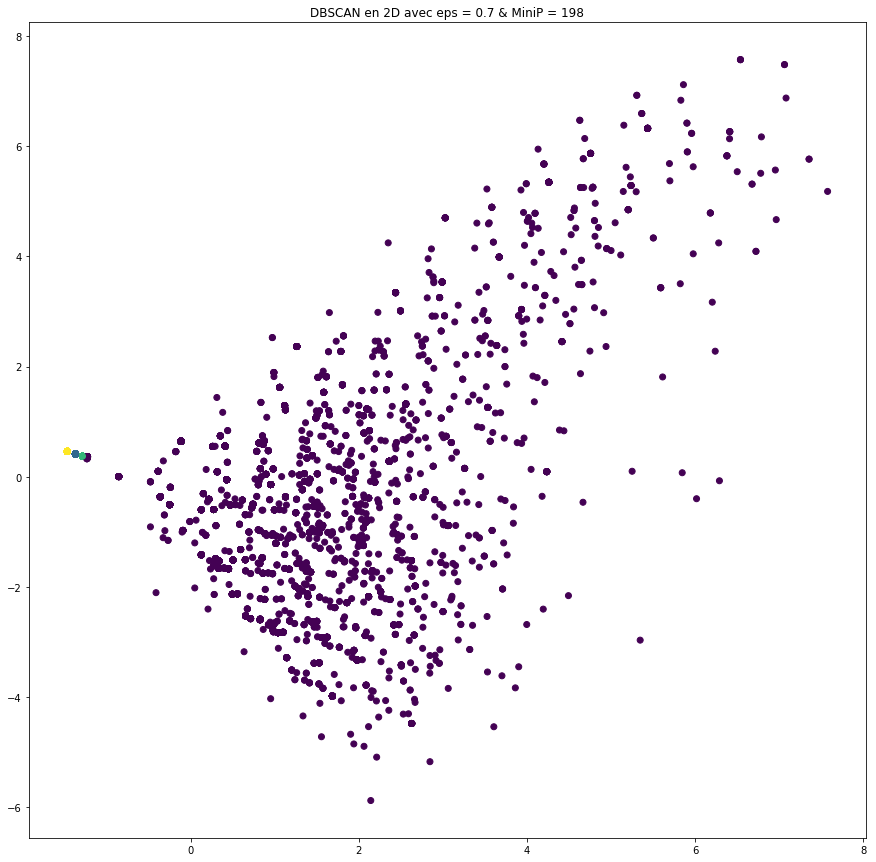

In [54]:
fig = plt.figure(figsize=(15,15))

cls_dbscan_7_198= cluster.DBSCAN(eps=0.7, 
                        min_samples=198, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_7_198.fit(data_films_prepro)
ax = fig.add_subplot(111)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_dbscan_7_198.labels_)
ax.set_title("DBSCAN en 2D avec eps = 0.7 & MiniP = 198")

<span style="color:#3366ff"> Tous les points se retrouvent dans le même groupe.

### Affichage des Clusters de DBSCAN en 3 dimensions

Text(0.5,0.92,'DBSCAN en 3D avec eps = 0.7 & MiniP = 198')

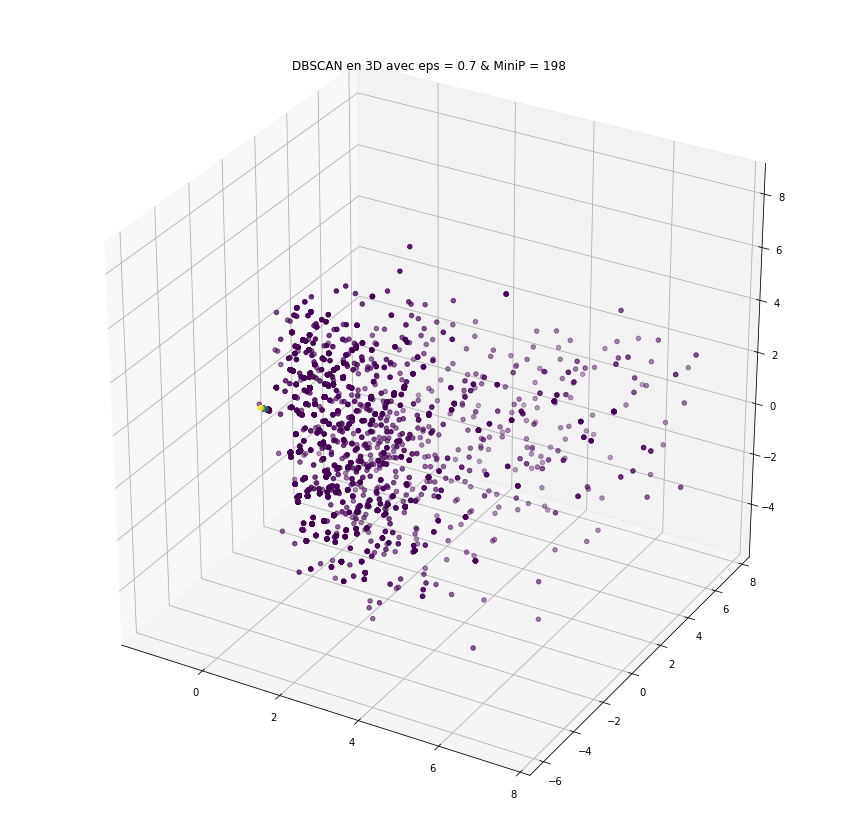

In [61]:
fig = plt.figure(figsize=(15,15))

#ax = fig.add_subplot(121,projection='3d')

cls_dbscan_7_198= cluster.DBSCAN(eps=0.7, 
                        min_samples=198, 
                        metric='euclidean', 
                        metric_params=None, 
                        algorithm='auto', 
                        leaf_size=30, 
                        p=None, 
                        n_jobs=1)
cls_dbscan_7_198.fit(data_films_prepro)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_dbscan_7_198.labels_)
ax.set_title("DBSCAN en 3D avec eps = 0.7 & MiniP = 198")

<span style="color:#3366ff"> Tous les points se retrouvent dans le même groupe.

# Identification de groupes de films par Clustering Hierarchique

<span style="color:#3366ff"> <strong> --> Le Clustering Hierarchique a un hyperparamètre: le Nb de Cluster

### CAH Recherche du Nb de Clusters: silhouette

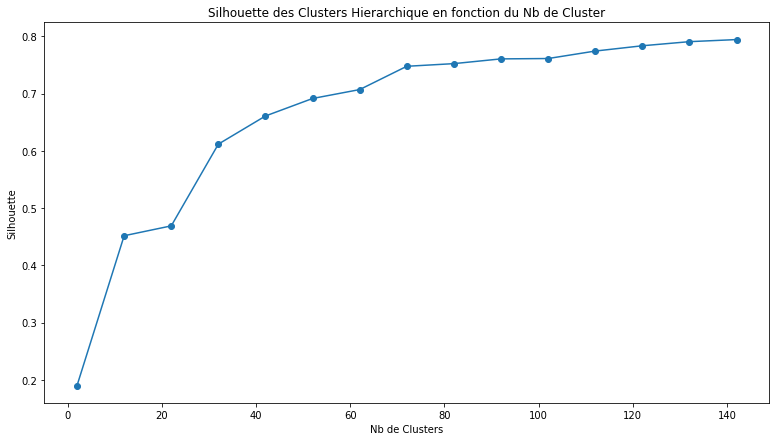

In [66]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters Hierarchique en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")


silhouettes = []
for num_cluster in range(2,150,10):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(data_films_prepro)
    silh = metrics.silhouette_score(data_films_prepro, cls_cah.labels_)
    silhouettes.append(silh)

plt.plot(range(2,150,10), silhouettes, marker='o')

<span style="color:#3366ff"> Plus le Nb de Cluster est grand, plus la silhouette est grande

### CAH Recherche du Nb de Clusters: Calinski

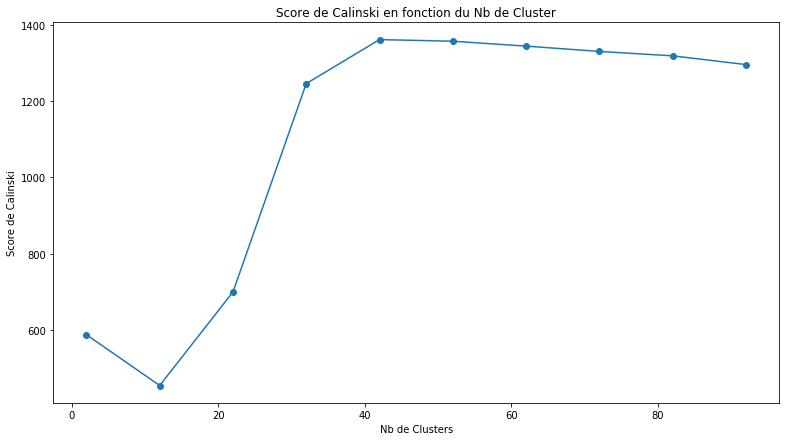

In [67]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")


calinski = []
for num_cluster in range(2,100,10):
    #epsilon_val = epsilon_val/10
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 

    cls_cah.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_cah.labels_)
    calinski.append(cali)

plt.plot(range(2,100,10), calinski, marker='o')

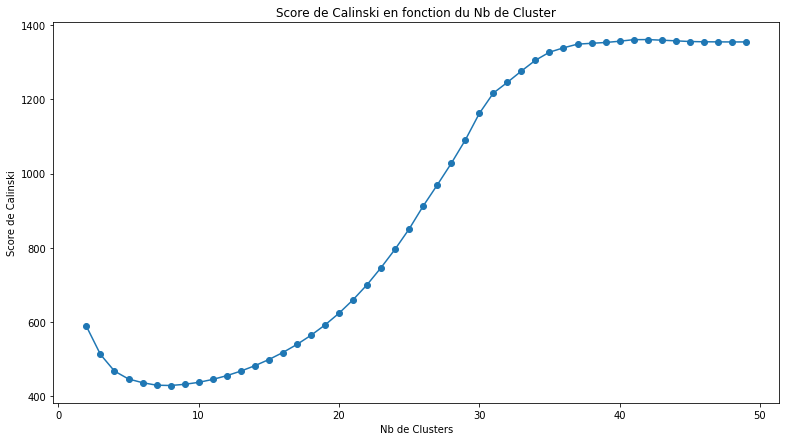

In [63]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")


calinski = []
for num_cluster in range(2,50):
    #epsilon_val = epsilon_val/10
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 

    cls_cah.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_cah.labels_)
    calinski.append(cali)

plt.plot(range(2,50), calinski, marker='o')

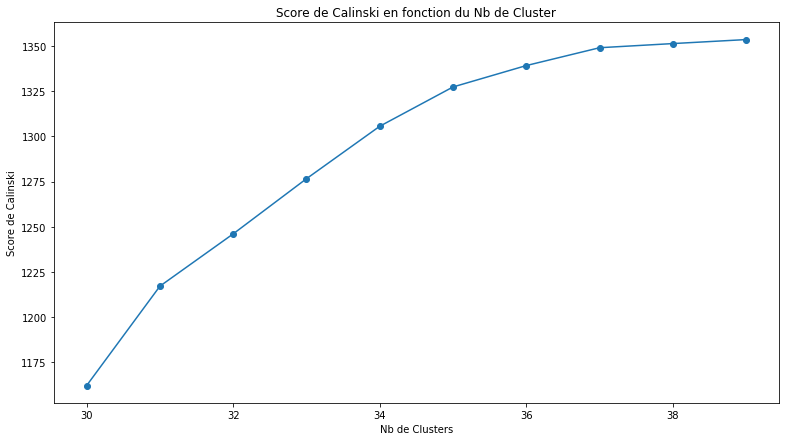

In [64]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")


calinski = []
for num_cluster in range(30,40):
    #epsilon_val = epsilon_val/10
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 

    cls_cah.fit(data_films_prepro)
    cali = metrics.calinski_harabaz_score(data_films_prepro, cls_cah.labels_)
    calinski.append(cali)

plt.plot(range(30,40), calinski, marker='o')

In [68]:
test  =max(calinski)
test

1361.4755700444127

<span style="color:#3366ff"> Cal = 1361 pour N=40

### Affichage des Clustering Hierarchique en 2 dimensions

Text(0.5,1,'Clustering Hierarchique de 40 groupes en 2D')

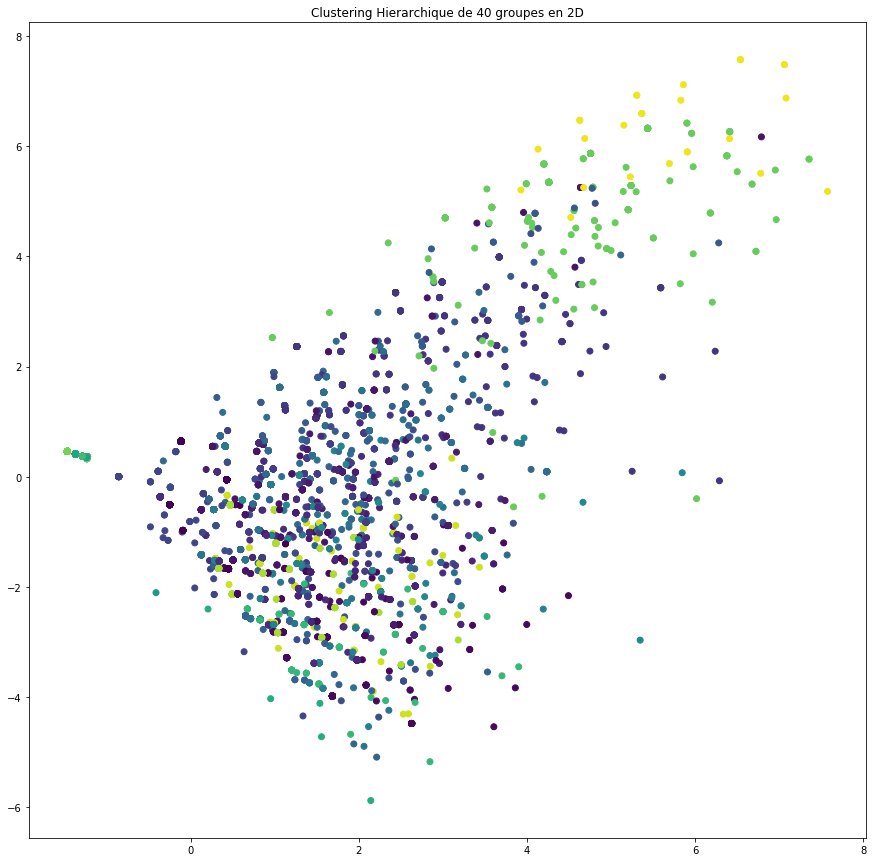

In [69]:
fig = plt.figure(figsize=(15,15))


cls_cah_40 = cluster.AgglomerativeClustering(n_clusters=40, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 
cls_cah_40.fit(data_films_prepro)
ax = fig.add_subplot(111)
ax.scatter(data_films_prepro_trans[:,0], 
           data_films_prepro_trans[:,1], 
           c=cls_cah_40.labels_)
ax.set_title("Clustering Hierarchique de 40 groupes en 2D")

### Affichage des Clustering Hierarchique en 3 dimensions

Text(0.5,0.92,'Clustering Hierarchique de 40 groupes en 2D')

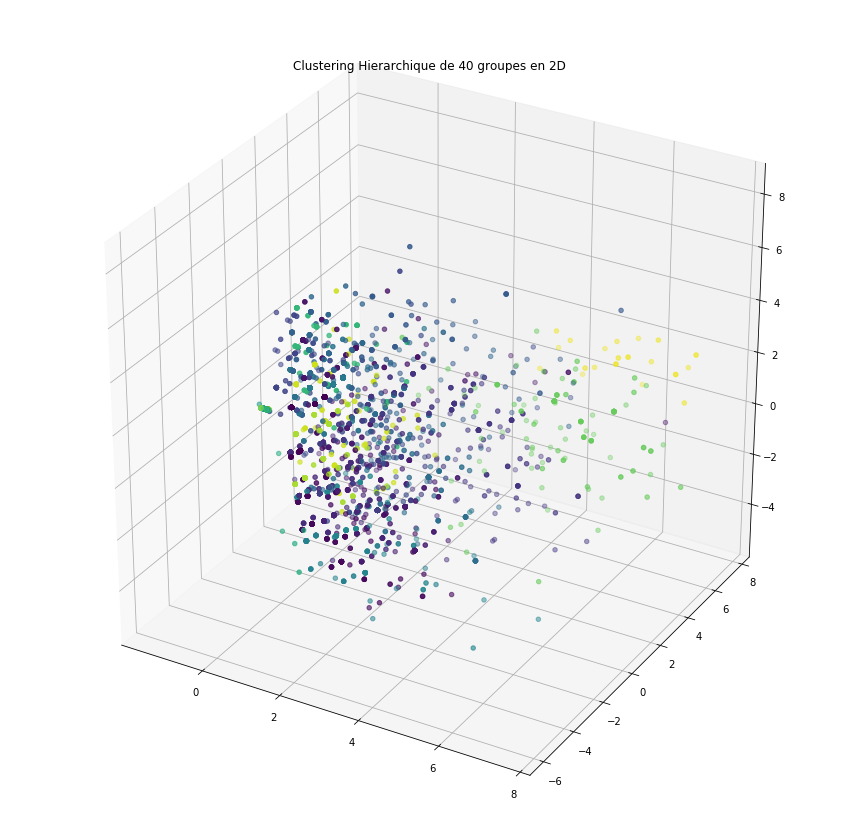

In [71]:
fig = plt.figure(figsize=(15,15))


cls_cah_40 = cluster.AgglomerativeClustering(n_clusters=40, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward') 
cls_cah_40.fit(data_films_prepro)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_films_prepro_trans_3[:,0], 
           data_films_prepro_trans_3[:,1], 
           data_films_prepro_trans_3[:,2], 
           c=cls_cah_40.labels_)
ax.set_title("Clustering Hierarchique de 40 groupes en 2D")

# Synthèse du Clustering pour les Variables Alphanumériques

<span style="color:#3366ff"> A) K-MEANS, Calinski = 1075 pour N=170;   
<span style="color:#3366ff"> B) DBSCAN, Calinski = 407 pour N=198 et Eps=0.7;   
<span style="color:#3366ff"> C) CAH, Calinski = 1342 pour N=40.  
        
<span style="color:#3366ff"> <strong> Le meilleur Clustering pour les variables alphanumériques est le CAH avec N=40.

# Conclusion Notebook 3: Variables Alphanuméques

<span style="color:#3366ff"> Pour ces 38 variables Alphanumériques "Genres + Rating", le clustering avec le meilleur Calinski est le CAH avec N=40 (Calinski = 1361).
    
<span style="color:#3366ff"> <strong> Le clusteing obtenu avec les variables numériques est de meilleur qualité, Cf Notebook 2.  

# Synthèse globale Clustering : Variable Num, Alphanum et Mix Alpha Num

<span style="color:#3366ff">  <strong> Le Clustering qui a la meilleure Silhouettte et le meilleure Calinski est le CAH avec N = 50 sur un mix de paramèters numériques et alphanumériques.

# CONCLUSION

<span style="color:#3366ff"> Ce moteur, bien qu’imparfait, permet de proposer des films aux 1ers utilisateurs du site.

<span style="color:#3366ff"> Pour cela il utilise les variables suivants de la base de donnée IMDb:    
<span style="color:#3366ff"> - director_facebook_likes,    
<span style="color:#3366ff">- cast_total_facebook_likes,    
<span style="color:#3366ff"> - num_critic_for_reviews,    
<span style="color:#3366ff"> - num_voted_users,    
<span style="color:#3366ff"> - num_user_for_reviews,    
<span style="color:#3366ff"> - imdb_score,    
<span style="color:#3366ff"> - movie_facebook_likes    
<span style="color:#3366ff"> - Les 23 « genres » déconcaténés,    
<span style="color:#3366ff"> - Les 15 « content_rating » déconcaténés.    

<span style="color:#3366ff"> <strong> Inconvénient de ce moteur: </strong>      
<span style="color:#3366ff">  - système basé sur un "petit" clustering     
<span style="color:#3366ff">  - les films les plus vieux sont moins populaires sur facebook -> biais     